# Telco Customer Churn

# Goal:
   * Predict customer churn
   * Find out the key drivers that lead to churn


# Importing Libraries and data

In [1]:

import warnings

from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')
import wrangle as w
import explore as e
import modeling as m
# acquiring, cleaning, and adding features to data
df = w.get_telco()
df = w.wrangle_telco_encoded(df)

# splitting data into train, validate, and test
train, validate, test = w.train_validate_test(df, "churn")


# Acquire Data
   * Data is acquired from codeup database using get_telco_data function from wrangle.py
   * Telco has 7043 rows and 24 columns before cleaning

# Prepare
## Prepare Actions
   * Checked for null values and found none
   * Checked for duplicates and found none
   * converted total_charges to float
   * encoded churn, contract_type, internet_service_type, and payment_type
   * split data into train, validate, and test

# Data Dictonary
| **Column**          | **Description**                                           |
|---------------------|-----------------------------------------------------------|
| **Customer ID**     | Customer ID                                               |
| **Gender**          | Whether the customer is a male or a female                |
| **SeniorCitizen**   | Whether the customer is a senior citizen or not           |
| **Partner**         | Whether the customer has a partner or not                 |
| **Dependents**      | Whether the customer has dependents or not                |
| **Tenure**          | Number of months the customer has stayed with the company |
| **PhoneService**    | Whether the customer has a phone service or not           |
| **Multiplelines**   | Whether the customer has multiple lines or not            |
| **InternetService** | Customer’s internet service provider                      |
| **OnlineSecurity**  | Whether the customer has online security or not           |
| **OnlineBackup**    | Whether the customer has online backup or not             |
| **DeviceProtection** | Whether the customer has device protection or not         |
| **TechSupport**     | Whether the customer has tech support or not              |
| **StreamingTV**     | Whether the customer has streaming TV or not              |
| **StreamingMovies** | Whether the customer has streaming movies or not          |
| **Contract**        | The contract term of the customer                         |
| **PaperlessBilling** | Whether the customer has paperless billing or not         |
| **PaymentMethod**   | The customer’s payment method                             |
| **MonthlyCharges**  | The amount charged to the customer monthly                |
| **TotalCharges**    | The total amount charged to the customer                  |
| **Churn**           | Whether the customer churned or not                       |


# Explore

# Is fiber optic a driver of churn?
$H_0$: Customers with fiber optic do not have a higher churn rate than those with DSL.
$H_a$: Customers with fiber optic have a higher churn rate than those with DSL.

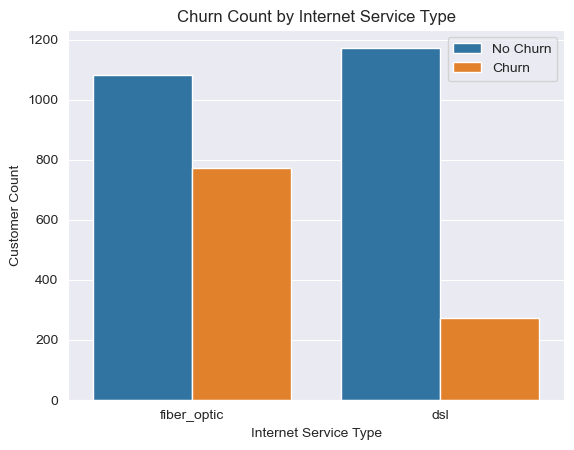

In [2]:
# Get Bar Plot of Churn Rate by Internet Service Type
e.plot_churn_rate_by_internet_service_type(train)

In [3]:
# Get Chi2 Test Results
e.chi2_test_for_churn_and_internet_service_type(train)

Observed

[[ 923 1447]
 [1855    0]]
---
Expected

[[1558.31005917  811.68994083]
 [1219.68994083  635.31005917]]
---

chi^2 = 1719.7872
p     = 0.0000
We reject the null hypothesis


## Takeaways
   * Fiber optic customers are more likely to churn than DSL customers
   * Fiber optic customers have a churn rate of 41.5% compared to DSL customers who have a churn rate of 18.5%

# Is fiber optic price a driver of churn?
$h_0$: Customers with fiber optic who pay more than the average monthly charge do not have a higher churn rate than those who pay less than the average monthly charge.
$h_a$: Customers with fiber optic who pay more than the average monthly charge have a higher churn rate than those who pay less than the average monthly charge.

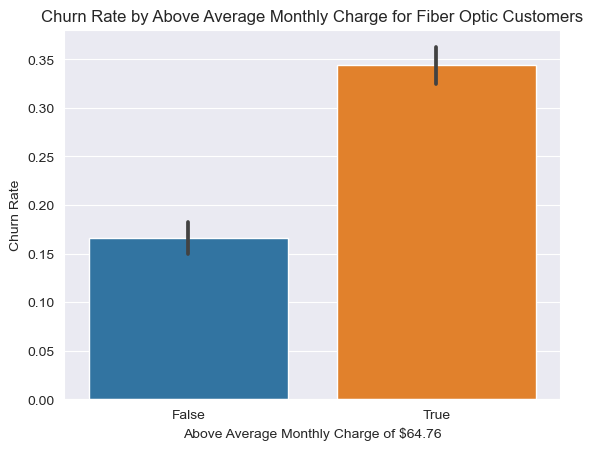

In [4]:
e.plot_churn_rate_by_above_avg_monthly_charge(train)

In [5]:
e.chi2_test_for_churn_and_above_avg_monthly_charge(train)

Observed

[[1559  310]
 [1545  811]]
---
Expected

[[1373.10674556  495.89325444]
 [1730.89325444  625.10674556]]
---

chi^2 = 169.1828
p     = 0.0000
We reject the null hypothesis


## Takeaways
   * Customers with monthly charges above the average are more likely to churn than those with monthly charges below the average
   * Customers with monthly charges above the average have a churn rate of 42.5% compared to customers with monthly charges below the average who have a churn rate of 17.5%

# Is contract type a driver of churn?

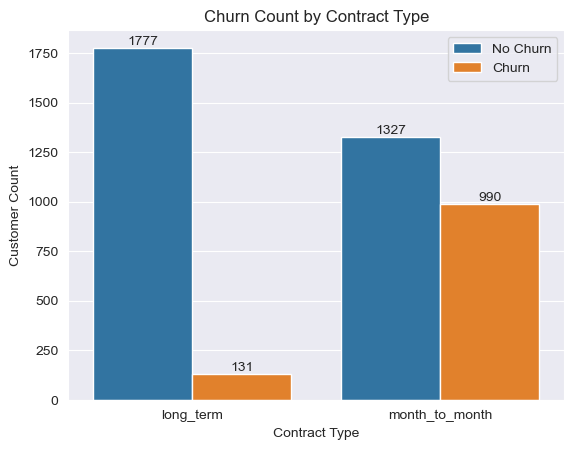

In [6]:
e.plot_churn_rate_by_contract_type(train)

In [7]:
e.chi2_test_for_churn_and_contract_type(train)

Observed

[[1777  131]
 [1327  990]]
---
Expected

[[1401.75905325  506.24094675]
 [1702.24094675  614.75905325]]
---

chi^2 = 688.5107
p     = 0.0000
We reject the null hypothesis


## Takeaways
   * Customers with month-to-month contracts are more likely to churn than those with one or two year contracts
   * Customers with month-to-month contracts have a churn rate of 42.5% compared to customers with one or two year contracts who have a churn rate of 6.5%

# Are customers with dependents more likely to churn than those without?

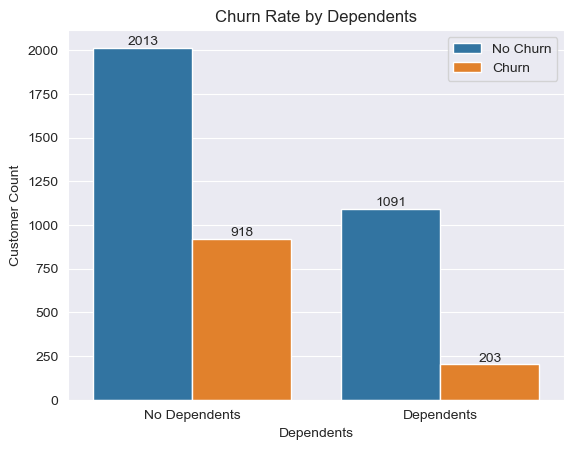

In [8]:
e.plot_churn_rate_by_dependents(train)

In [9]:
e.chi2_test_for_churn_and_dependents(train)

Observed

[[2013  918]
 [1091  203]]
---
Expected

[[2153.33112426  777.66887574]
 [ 950.66887574  343.33112426]]
---

chi^2 = 111.7405
p     = 0.0000
We reject the null hypothesis


## Takeaways
   * Customers without dependents are more likely to churn than those with dependents
   * Customers without dependents have a churn rate of 40.5% compared to customers with dependents who have a churn rate of 15.5%

# Exploration Summary
    * Fiber optic customers are more likely to churn than DSL customers
    * Customers with monthly charges above the average are more likely to churn than those with monthly charges below the average
    * Customers with month-to-month contracts are more likely to churn than those with one or two year contracts
    * Customers without dependents are more likely to churn than those with dependents

# Selected Features for Modeling
   * tenure
   * monthly_charges
   * total_charges
   * contract_type
   * internet_service_type
   * payment_type
   * senior_citizen
   * partner
   * dependents
   * phone_service
   * multiple_lines
   * online_security
   * online_backup
   * device_protection
   * tech_support
   * streaming_tv
   * streaming_movies
   * paperless_billing
   * churn

# Features that will be dropped
   * gender(Has no significance to churn)
   * payment_type_id(same as payment_type)
   * internet_service_type_id(same as internet_service_type)
   * contract_type_id(same as contract_type)


# Modeling

In [10]:
# Split data into train, validate, and test
x_train, y_train, x_validate, y_validate, x_test, y_test = m.split_xy(train, validate, test)


# Baseline Prediction
   * Baseline prediction of customers who do not churn is 73.46%
   * For the model to be useful, it must perform better than the baseline

# Model Selection

# Logistic Regression
   * Accuracy: 80.5%
   * Recall: 0.51
   * Precision: 0.65
   * F1: 0.57
   * Train Accuracy: 80.5%
   * Validate Accuracy: 80.5%


# Random Forest
   * Accuracy: 77.5%
   * Recall: 0.47
   * Precision: 0.61
   * F1: 0.53
   * Train Accuracy: 77.5%
   * Validate Accuracy: 77.5%

# KNN
   * Accuracy: 79.5%
   * Recall: 0.49
   * Precision: 0.63
   * F1: 0.55
   * Train Accuracy: 79.5%
   * Validate Accuracy: 79.5%

# Comparion of Models
   * Logistic Regression performed the best with an accuracy of 80.5%
   * Random Forest performed the worst with an accuracy of 77.5%
   * KNN performed in the middle with an accuracy of 79.5%


# Model Evaluation
   * All models performed better than the baseline
   * Models were evaluated on accuracy
   * Tested hyperparameters for each model to get the best accuracy with lowest variance between train and validate



# Logistic Regression Model on Test

In [11]:
m.test_model_test2(x_train, y_train, x_test, y_test)

------------------------------------
Model: LogisticRegression(penalty='l1', random_state=123, solver='liblinear')
Accuracy of Decision Tree classifier on test set: 0.818
[[932 103]
 [154 220]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1035
           1       0.68      0.59      0.63       374

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.76      1409
weighted avg       0.81      0.82      0.81      1409



# Modeling Summery
   * Logistic Regression performed the best with an accuracy of 81.8%
   * Random Forest performed the worst with an accuracy of 77.5%
   * KNN performed in the middle with an accuracy of 79.5%
   * All models performed better than the baseline
   * Models were evaluated on accuracy
   * Tested hyperparameters for each model to get the best accuracy with lowest variance between train and validate


# Conclusion
## Key Findings
   * Fiber optic customers are more likely to churn than DSL customers
   * Customers with monthly charges above the average are more likely to churn than those with monthly charges below the average
   * Customers with month-to-month contracts are more likely to churn than those with one or two year contracts
   * Customers without dependents are more likely to churn than those with dependents
## Recommendations
   * Offer incentives to customers with fiber optic to switch to DSL
   * Offer incentives to customers with monthly charges above the average to switch to a lower monthly charge
   * Offer incentives to customers with month-to-month contracts to switch to a one or two year contract
   * Offer incentives to customers without dependents to add dependents to their account
